<a href="https://colab.research.google.com/github/Miyazono45/learn-pytorch/blob/main/intro_to_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# ct = torch.randn(2,3,4)
# print(ct)

# cr = torch.randn(2,2,15)
# print(cr)
# cr = cr.reshape(-1,3)
# print(cr)
# crx = cr[:,-1:]
# print(crx)



# Simple NN (We'll use Iris Dataset)

In [5]:
class Model(nn.Module):
  def __init__(self, input_feature = 3, fh1 = 6, fh2 = 6, output_feature = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_feature, fh1)
    self.fc2 = nn.Linear(fh1, fh2)
    self.out = nn.Linear(fh2, output_feature)

  # to keep NN forwarding
  def forward(self, x):
    y = F.relu(self.fc1(x))
    y = F.relu(self.fc2(y)) # Fixed: Changed x to y
    y = self.out(y) # Fixed: Changed x to y

    return y

# Randomize
torch.manual_seed(22)
model = Model()

In [6]:
# Dataset for train
url_dataset = "/content/dataset/flower_dataset.csv"
df = pd.read_csv(url_dataset)

# Remap the species, size, fragrance value into float
df['fragrance'] = df['fragrance'].apply(lambda species: float(1.0) if species == "strong" else float(0.5) if species == "mild" else float(0.0))
df['size'] = df['size'].apply(lambda size: float(1.0) if size == "large" else float(0.5) if size == "medium" else float(0.0))
df['species'] = df['species'].apply(lambda species: float(1.0) if species == "rose" else float(0.5) if species == "shoeblack plant" else float(0.0))

train_data = df.drop('species', axis=1)
test_data = df['species']

train_data_value = train_data.values
test_data_value = test_data.values

In [7]:
# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(train_data_value, test_data_value, test_size=0.25, random_state=22)

# Convert train and test data into tensor
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [8]:
# Set criterion (measure the error), how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Using Adam Optimizer, lr = learning rate (if error doesn't go down after iteration, then lower the LR)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
#  Train Model
epochs = 500
losses = []

for i in range(epochs):
  # Forward and get prediction
  test_pred = model.forward(x_train)
  # Measure loss
  loss = criterion(test_pred, y_train)
  # Track loss
  losses.append(loss.detach().numpy())

  # Print epoch
  if i % 10 == 0:
    print(f'Epoch {i} with loss {loss}')

  # Back propragation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 with loss 1.3023325204849243
Epoch 10 with loss 1.172639012336731
Epoch 20 with loss 1.1029198169708252
Epoch 30 with loss 1.0424747467041016
Epoch 40 with loss 0.9902308583259583
Epoch 50 with loss 0.9455634951591492
Epoch 60 with loss 0.907737135887146
Epoch 70 with loss 0.8757438659667969
Epoch 80 with loss 0.8486814498901367
Epoch 90 with loss 0.825756847858429
Epoch 100 with loss 0.8062688112258911
Epoch 110 with loss 0.7896276712417603
Epoch 120 with loss 0.7753435373306274
Epoch 130 with loss 0.763015627861023
Epoch 140 with loss 0.7523171305656433
Epoch 150 with loss 0.7429824471473694
Epoch 160 with loss 0.7347941398620605
Epoch 170 with loss 0.7275746464729309
Epoch 180 with loss 0.7211782336235046
Epoch 190 with loss 0.7154848575592041
Epoch 200 with loss 0.7103949785232544
Epoch 210 with loss 0.7058258652687073
Epoch 220 with loss 0.701708197593689
Epoch 230 with loss 0.6979838609695435
Epoch 240 with loss 0.6946035623550415
Epoch 250 with loss 0.6915255188941956
Ep

Text(0.5, 0, 'Epoch')

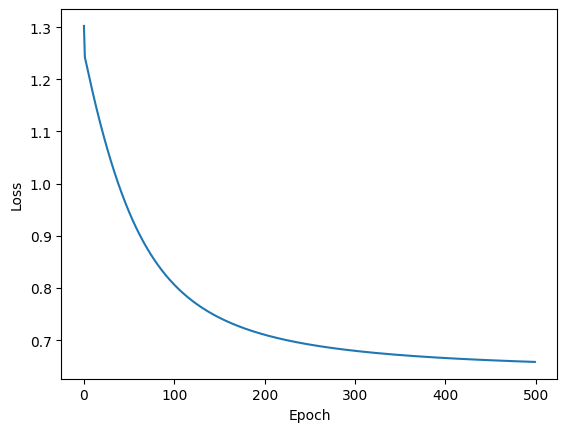

In [10]:
# Graph the losses
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [15]:
# Evaluate Model
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test) # find differet from evaluate and test

# Show correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1


print(f'Accuracy: {correct/len(y_test)}')

1. tensor([ 1.6137,  0.9665, -1.9496]) 1
2. tensor([ 1.6137,  0.9665, -1.9496]) 0
3. tensor([ 1.6137,  0.9665, -1.9496]) 0
4. tensor([ 1.6137,  0.9665, -1.9496]) 0
5. tensor([ 1.6137,  0.9665, -1.9496]) 0
6. tensor([ 1.6137,  0.9665, -1.9496]) 1
7. tensor([ 1.6137,  0.9665, -1.9496]) 0
8. tensor([ 1.6137,  0.9665, -1.9496]) 0
9. tensor([ 1.6137,  0.9665, -1.9496]) 0
10. tensor([ 1.6137,  0.9665, -1.9496]) 0
11. tensor([ 1.6137,  0.9665, -1.9496]) 0
12. tensor([ 1.6137,  0.9665, -1.9496]) 0
13. tensor([ 1.6137,  0.9665, -1.9496]) 0
14. tensor([ 1.6137,  0.9665, -1.9496]) 0
15. tensor([ 1.6137,  0.9665, -1.9496]) 1
16. tensor([ 1.6137,  0.9665, -1.9496]) 0
17. tensor([ 1.6137,  0.9665, -1.9496]) 1
18. tensor([ 1.6137,  0.9665, -1.9496]) 0
19. tensor([ 1.6137,  0.9665, -1.9496]) 1
20. tensor([ 1.6137,  0.9665, -1.9496]) 0
21. tensor([ 1.6137,  0.9665, -1.9496]) 0
22. tensor([ 1.6137,  0.9665, -1.9496]) 0
23. tensor([ 1.6137,  0.9665, -1.9496]) 0
24. tensor([ 1.6137,  0.9665, -1.9496]) 1
2